# Исследование объявлений о продаже квартир

Цель проекта: В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Импортируем библиотеки

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Откроем файл с данными и изучите общую информацию. 

In [89]:
data = pd.read_csv('D:/DA/projects/real_estate_data.csv', '\t')

### Изучение общей информации

In [90]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных:**
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — общая площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м) 
- parks_around3000 — число парков в радиусе 3 км 
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) 

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

22 столбца, 23 699 строк, есть пропущенные значения

In [92]:
data_old=data.shape[0]

### Построим общую гистограмму для всех столбцов таблицы

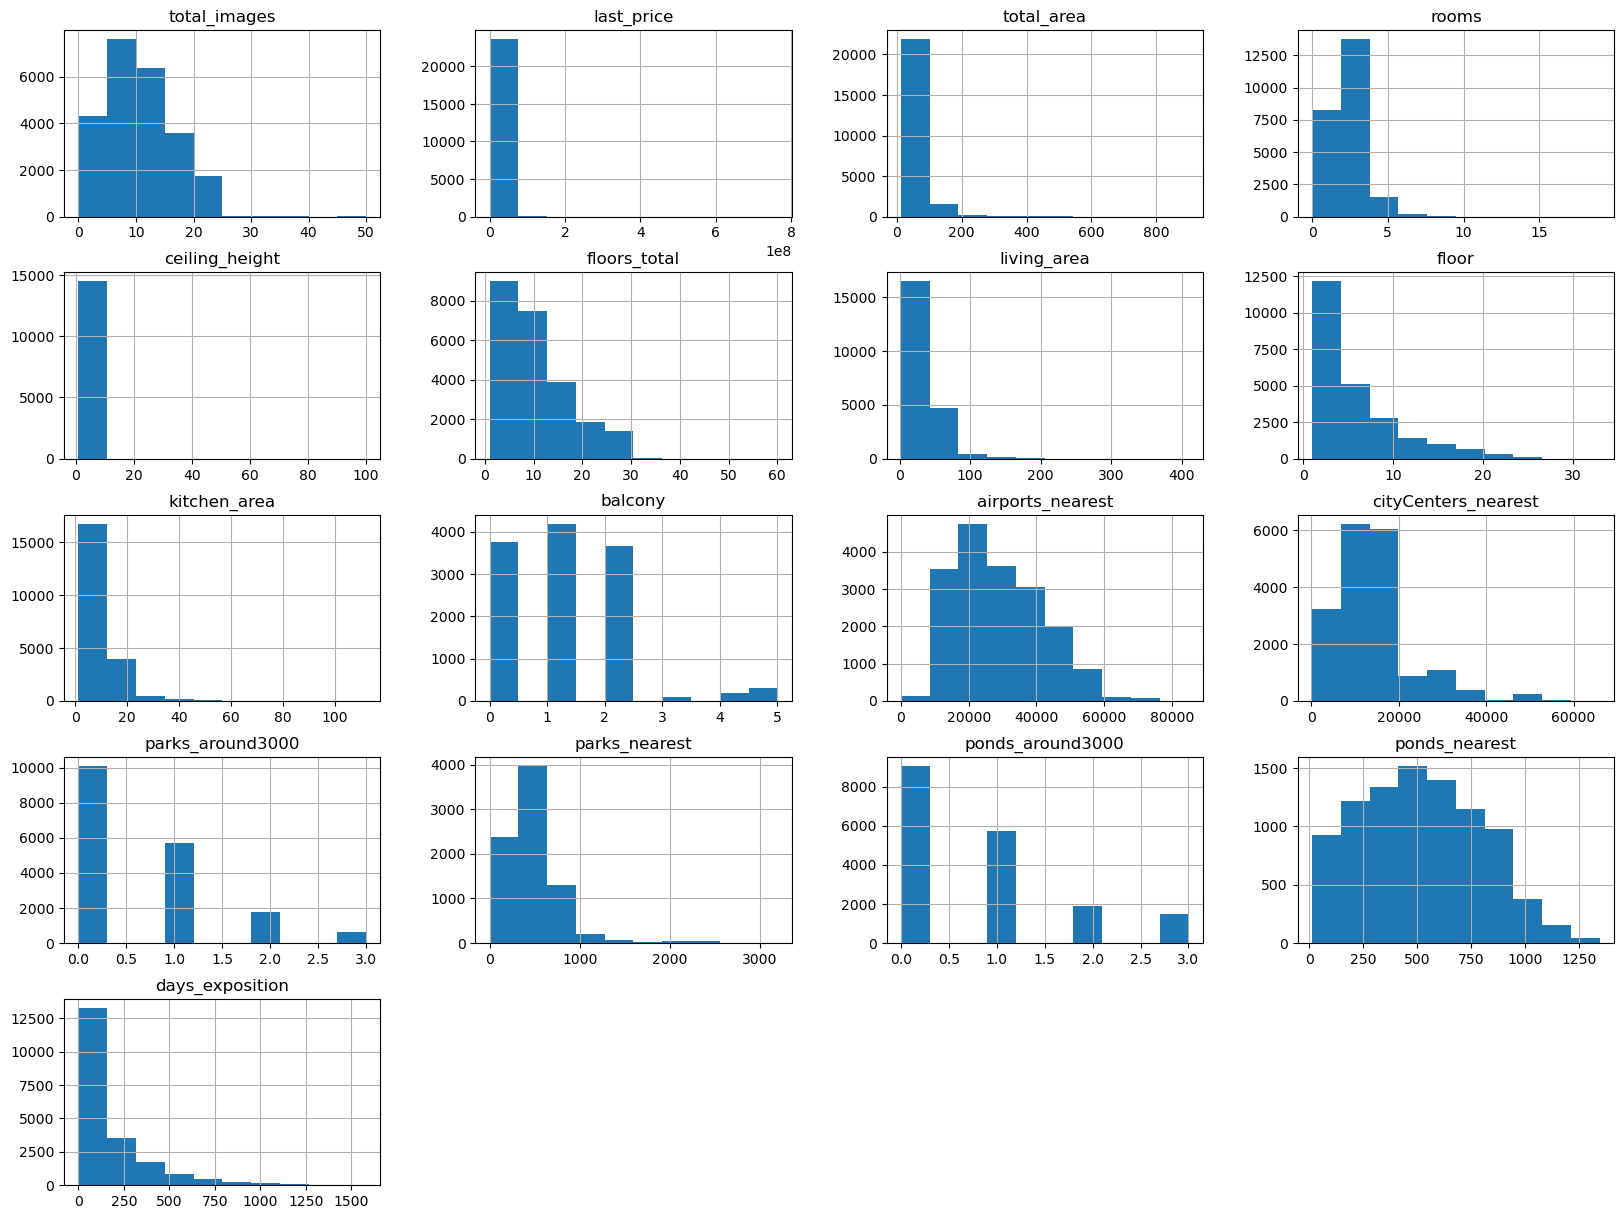

In [93]:
data.hist(figsize = (20, 15))
plt.show()

Выводы:
1. Видим наличие пропусков в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition  
2. first_day_exposition, дата публикации, имеет тип данных object, а должен быть datetime
3. floors_total, всего этажей в доме, имеет тип данных float, а должен быть int.
4. is_apartment, апартаменты, имеет тип данных object, а должен быть bool.
5. balcony, число балконов, имеет тип данных float, а должен быть int.
6. parks_around3000, число парков в радиусе 3 км, имеет тип данных float, а должен быть int.
7. ponds_around3000, число водоёмов в радиусе 3 км, имеет тип данных float, а должен быть int.
8. days_exposition, сколько дней было размещено объявление, имеет тип данных float, а должен быть int.
9. Странно выглядят гистограммы Last_price, ceiling_height. 

## Предобработка данных

### Устранение пропущенных значений и изменение типов данных

In [94]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
total_images,0.00%
open_plan,0.00%
floor,0.00%
rooms,0.00%
studio,0.00%
total_area,0.00%
last_price,0.00%
first_day_exposition,0.00%
locality_name,0.21%
floors_total,0.36%


Пропущены значения:
   - высота потолков (м)  9195
   - всего этажей в доме  86
   - жилая площадь в квадратных метрах (м²) 1903
   - Апартаменты 20924
   - площадь кухни в квадратных метрах (м²) 2278
   - Балконы 11519
   - название населённого пункта 49
   - расстояние до ближайшего аэропорта в метрах (м) 5542
   - расстояние до центра города (м) 5519
   - число парков в радиусе 3 км 5518
   - расстояние до ближайшего парка (м) 15620
   - число водоёмов в радиусе 3 км 5518
   - расстояние до ближайшего водоёма (м) 14589
   - сколько дней было размещено объявление (от публикации до снятия) 3181
   
1. Пропуски в столбце площадь кухни, возможно, из-за того что это квартиры студии, где нет кухонь.
2. Вероятно, в столбце балконы пропущены значения, из-за того, что балконов нет и поэтому собственники не указали эти данные.
3. Остальные значения, возможно, пропущены из-за отсутствия обязательного требования по их заполнению. Очень странно, конечно, что пропущены основные значения, такие, как площадь, высота.

   

#### Работа с столбцом ceiling_height

**Заполним медианной высоту потолков ориентируясь на населенный пунк, Санкт-Петербур учитывать не будем.**

In [95]:
transformed_ceil1 = round(data.loc[data['locality_name'] != 'Санкт-Петербург'].groupby('locality_name')['ceiling_height'].transform('median'))
data.loc[data['locality_name'] != 'Санкт-Петербург', 'ceiling_height'] = \
data.loc[data['locality_name'] != 'Санкт-Петербург', 'ceiling_height'].fillna(transformed_ceil1)

**Санкт-Петербург мы не учитывали, так как архитектура города разнообразна, что конечно же и отразилось на высоту потолков. При заполнение медианным значением, будем отиентироваться на расстояния от центра. Это логично, сначало был центр, потом регулярно город разратался вокруг него с примерно одинаквыми домами, характерными тому историческому периоду.**

In [96]:
transformed_ceil2 = round(data.loc[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest')['ceiling_height'].transform('median'))
data.loc[data['locality_name'] == 'Санкт-Петербург', 'ceiling_height'] = \
data.loc[data['locality_name'] == 'Санкт-Петербург', 'ceiling_height'].fillna(transformed_ceil2)

In [97]:
data['ceiling_height'].isna().sum()

1900

#### Работа со столбцом floors_total

In [98]:
# Удалим строки, где пропущены значения floors_total, так как 86 строк это менее 1% всех данных. Это не сильно повлияет
# на общий анализ
data = data.dropna(subset=['floors_total'])

In [99]:
# Изменим тип данных с float на int. Количество этажей все таки это целое число.
data['floors_total'] = data['floors_total'].astype('int')

#### Работа со столбцом living_area

**Заполним пропущенные значения ориентируясь. Агрегацию сделаем по общей площади.**

In [100]:
transformed_living_area = round(data.groupby('total_area')['living_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(transformed_living_area)

#### Работа со столбцом is_apartment

In [101]:
# Заполним пропущенные значения 0, так пропущенно очень много значений, наврятли, это аппартаменты. Квартиры с пропиской более актуальны в России.
# И изменим тип данных с object на bool, как положено.
data['is_apartment'] = data['is_apartment'].fillna(0).astype('bool')

#### Работа со столбцом kitchen_area

**Заполняем по аналогии с жилой площадью**

In [102]:
transformed_kitchen_area = round(data.groupby('total_area')['kitchen_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(transformed_kitchen_area)

#### Работа со столбцом balcony

In [103]:
# Заполним пропущенные значения 0, так как значения, скорее всего, пропущены по причине отсутствия балконов.
# Изменим тип данных с float на int
data['balcony'] = data['balcony'].fillna(0).astype('int')

#### Работа со столбцом locality_name

In [104]:
# Удалим строки, где пропущены значения locality_name, так как 49 строк это менее 1% всех данных. Это не сильно повлияет
# на общий анализ
data = data.dropna(subset=['locality_name'])

#### Работа со столбцом park_around3000

In [105]:
# Возможно значения пропущены из-за отсутствия рядом парков. Заменим пропущенные значения на 0
# Изменим тип данных с float на int
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

#### Работа со столбцом ponds_around3000

In [106]:
# Возможно значения пропущены из-за отсутствия рядом прудов. Заменим пропущенные значения на 0
# Изменим тип данных с float на int
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

#### Работа с first_day_exposition

In [107]:
# Проверим как выглядят данные в столбце first_day_exposition
data['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

In [108]:
# Изменим тип данных с object на datetime и заодно уберем данные по времени, так как оно везде 00.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
# Проверим изменения
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

#### Работа со столбцом days_exposition 

Пропущено достаточно много значений

In [109]:
display('Пропущено', round((data['days_exposition'].isnull().sum() / data.shape[0])*100), 'процентов') 

'Пропущено'

13

'процентов'

Это достаточно много.

#### Работа со столбцом airports_nearest 

Пропущено довольно большое количество значений, поэтому мы не можем просто взять и удалить эти строки. Возможно лучшем решением будет заполнить эти пропуски медианным значением. Сделаем это, а в дальше посмотрим на результаты анализа.

**Заполним пропущеные значения ориентируясь на населенный пункт.**

In [110]:
transformed_nearest = round(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['airports_nearest'] = data['airports_nearest'].fillna(transformed_nearest)

#### Работа со столбцом cityCenters_nearest

Пропущено довольно большое количество значений, поэтому мы не можем просто взять и удалить эти строки. Возможно лучшем решением будет заполнить эти пропуски медианным значением. Сделаем это, а в дальше посмотрим на результаты анализа.

In [111]:
transformed_nearest = round(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(transformed_nearest)

#### Работа со столбцами parks_nearest, ponds_nearest

Пропущено очень много значений, поэтому не будем заполнять данные медианными значениями, так как это будет не корректно. Все оставим так

**Я думаю, пропусски возникли по ряду причин. Во первых данные пункты анкеты на недвижимость могли появиться недавно, так как люди при выборе жилья стали все больше обращать внимание и на другие аспекты, помимо площади. Во вторых люди указывают при продаже квартиры адрес и они подразумевают, что покупатель откроет карту и сам все изучит. Ну и конечно для некоторых тяжело высчитать эти данные, так как они не умеют пользоваться картами.**

###  Устранение неявных дубликатов в названиях населённых пунктов

In [112]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [113]:
data['locality_name'].value_counts()

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Видим различное написание посёлков: поселок, посёлок, поселок городского типа. Исправим это и приведем к одному значению посёлок

In [114]:
data = data.replace(to_replace=['поселок городского типа', 'поселок', 'посёлок городского типа'], value='посёлок', regex=True)

In [115]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

In [116]:
data['locality_name'].value_counts()

Санкт-Петербург         15651
посёлок Мурино            552
посёлок Шушары            439
Всеволожск                398
Пушкин                    369
                        ...  
посёлок Алексеевка          1
посёлок Белоостров          1
деревня Пельгора            1
посёлок Каложицы            1
посёлок Дзержинского        1
Name: locality_name, Length: 329, dtype: int64

На 35 наименований стало меньше, за счет зачистки неявных дубликатов

### Устранение редких и выбивающихся значений в столбцах

#### Работа с столбцом ceiling_height

In [117]:
data['ceiling_height'].sort_values(ascending=False).head(10)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
21824     27.0
10773     27.0
20478     27.0
4876      27.0
326       27.0
5807      27.0
Name: ceiling_height, dtype: float64

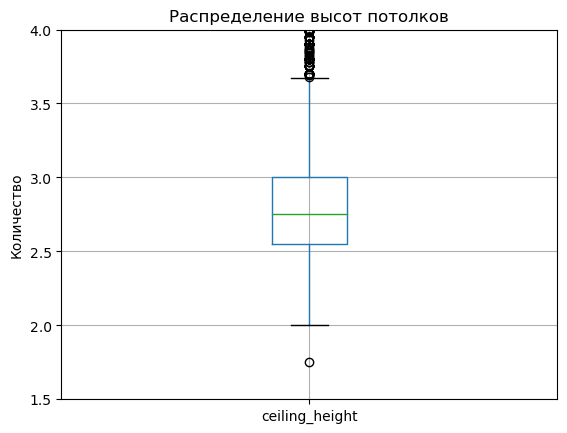

In [118]:
data.boxplot('ceiling_height')
plt.ylim(1.5, 4)
plt.title('Распределение высот потолков')
plt.ylabel('Количество');

In [119]:
data['ceiling_height'].describe()

count    21718.000000
mean         2.806426
std          1.131347
min          1.000000
25%          2.550000
50%          2.750000
75%          3.000000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана 2,75. Стандартное отклонение 1,13 от среднего. Видим большое количество выбросов за 3.5 м.

Аномальные значения для потолков. Возможно при заполнении неверно поставили точку. Вместо 25.0 должно быть 2.5. Также примем, что 10 метровые потолки действительно могуть быть, квартиры с нестандартной планировкой.

In [120]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 11, data['ceiling_height']/10) 

In [121]:
data['ceiling_height'].sort_values(ascending=False).head(10)

22309    10.3
22869    10.0
5863      8.3
17442     8.0
3474      8.0
15743     8.0
20677     6.0
20264     6.0
7015      6.0
21227     5.8
Name: ceiling_height, dtype: float64

In [122]:
data['ceiling_height'].sort_values().head()

22590    1.0
5712     1.2
10067    1.4
15061    1.4
10069    1.4
Name: ceiling_height, dtype: float64

In [123]:
# Не будем учитывать в анализе потолки 1.0, 1.2 и 1.4 м, так как такие помещения не пригодны для жизни. Если, конечно, это не ошибка в данных.
data = data.query('ceiling_height > 1.5')

#### Разбираемся со столбцом living_area

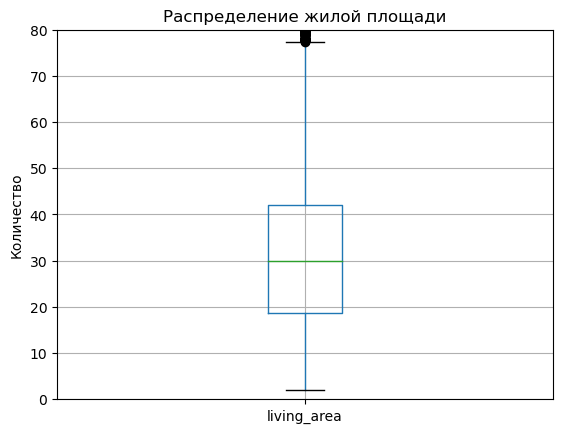

In [124]:
data.boxplot('living_area')
plt.ylim(0, 80)
plt.title('Распределение жилой площади')
plt.ylabel('Количество');

In [125]:
data['living_area'].describe()

count    21588.000000
mean        34.287755
std         21.642058
min          2.000000
25%         18.600000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Медианное значение 30, верхний ус в районе 80. Все что выше выбросы.

In [126]:
data['living_area'].sort_values(ascending=False).head(10)

19540    409.7
5358     409.0
12401    347.5
12859    322.3
660      312.5
8018     301.5
14088    300.0
20273    279.6
22494    274.0
19865    260.0
Name: living_area, dtype: float64

Вполне верю, что квартира может иметь 409,7 м2

In [127]:
data['living_area'].sort_values().head(10)

21758    2.0
13915    2.0
23574    3.0
3242     3.0
17582    5.0
21943    5.4
16431    6.0
19251    6.5
20994    8.0
23208    8.0
Name: living_area, dtype: float64

А вот с маленькой квадратурой есть сомнения. Пока все оставим так. Возможно это квартиры из старого фонда, переделанные комуналки.

#### Работа c kitchen_aria

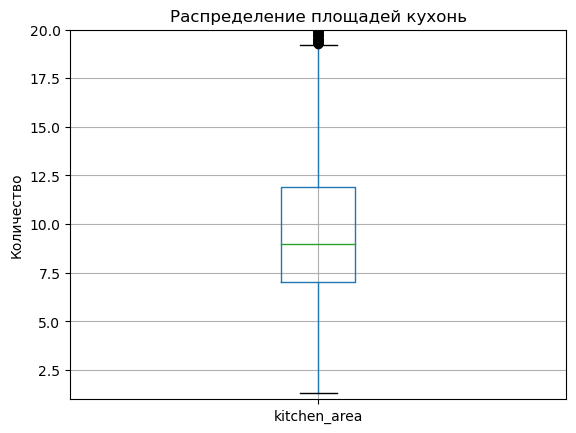

In [128]:
data.boxplot('kitchen_area')
plt.ylim(1, 20)
plt.title('Распределение площадей кухонь')
plt.ylabel('Количество');

In [129]:
data['kitchen_area'].describe()

count    21544.000000
mean        10.460847
std          5.790299
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

Граница нормального размаха лежит между 1 и 20. Медианное значение 9.1

In [130]:
data['kitchen_area'].sort_values(ascending=False).head(10)

19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
492       77.0
4394      77.0
14644     75.0
Name: kitchen_area, dtype: float64

Отклонений не наблюдаю

In [131]:
data['kitchen_area'].sort_values().head(10)

20217    1.3
21419    2.0
6262     2.0
11033    2.0
906      2.0
16367    2.0
16093    2.0
21425    2.0
17834    2.3
8729     2.4
Name: kitchen_area, dtype: float64

Допускаю, что бывают такие маленькие кухни. По моим ощущением, у меня тоже кухня 1м2.

#### Работа с room

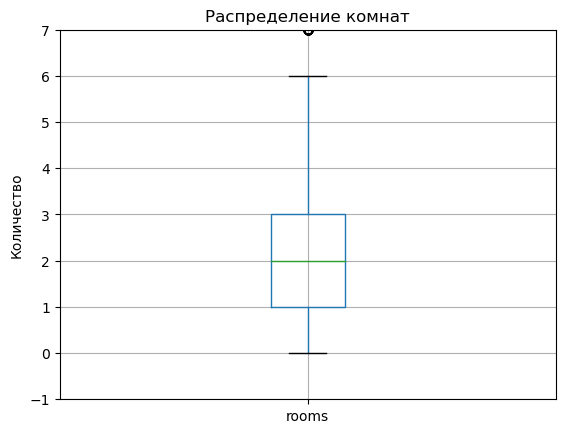

In [132]:
data.boxplot('rooms')
plt.ylim(-1, 7)
plt.title('Распределение комнат')
plt.ylabel('Количество');

In [133]:
data['rooms'].describe()

count    21708.000000
mean         2.060669
std          1.065529
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Медианное значение 2, нормальный размах между 0 и 6.

In [134]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  6,  5,  0,  7, 11, 14, 10,  8, 15,  9, 16, 12],
      dtype=int64)

In [135]:
data['rooms'].value_counts()

1     7436
2     7255
3     5328
4     1052
5      285
0      182
6       91
7       53
8        9
9        8
10       3
11       2
14       1
15       1
16       1
12       1
Name: rooms, dtype: int64

19 комнат! не плохо. 194 квартир без комнат, видимо это студии.

#### Проверим как изменились данные

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21708 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21708 non-null  int64         
 1   last_price            21708 non-null  float64       
 2   total_area            21708 non-null  float64       
 3   first_day_exposition  21708 non-null  datetime64[ns]
 4   rooms                 21708 non-null  int64         
 5   ceiling_height        21708 non-null  float64       
 6   floors_total          21708 non-null  int32         
 7   living_area           21588 non-null  float64       
 8   floor                 21708 non-null  int64         
 9   is_apartment          21708 non-null  bool          
 10  studio                21708 non-null  bool          
 11  open_plan             21708 non-null  bool          
 12  kitchen_area          21544 non-null  float64       
 13  balcony         

In [137]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area               120
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              164
balcony                     0
locality_name               0
airports_nearest         5313
cityCenters_nearest      5313
parks_around3000            0
parks_nearest           14531
ponds_around3000            0
ponds_nearest           13617
days_exposition          2996
dtype: int64

In [138]:
data_new = data.shape[0]

In [139]:
data_new / data_old

0.9159880163719988

0.92 Данные удалось сохранить. Можем двигатьcя дальше.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим столбец "цена квадратного метра"

In [140]:
data['aria_price'] = round(data['last_price'] / data['total_area'], 2)

#### Добавим столбец "день недели публикации объявления"

In [141]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday

#### Добавим столбец "месяц публикации объявления"

In [142]:
data['month_exposition'] = data['first_day_exposition'].dt.month

#### Добавим столбец "год публикации объявления"

In [143]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition']

0        2019
1        2018
3        2015
4        2018
5        2018
         ... 
23693    2016
23694    2017
23695    2018
23697    2017
23698    2017
Name: year_exposition, Length: 21708, dtype: int64

#### Добавим столбец тип этажа квартиры

In [144]:
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

In [145]:
data['floor_type'] = data.apply(floor_category, axis=1)

In [146]:
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000)

## Проведем исследовательский анализ данных

### Общая площадь

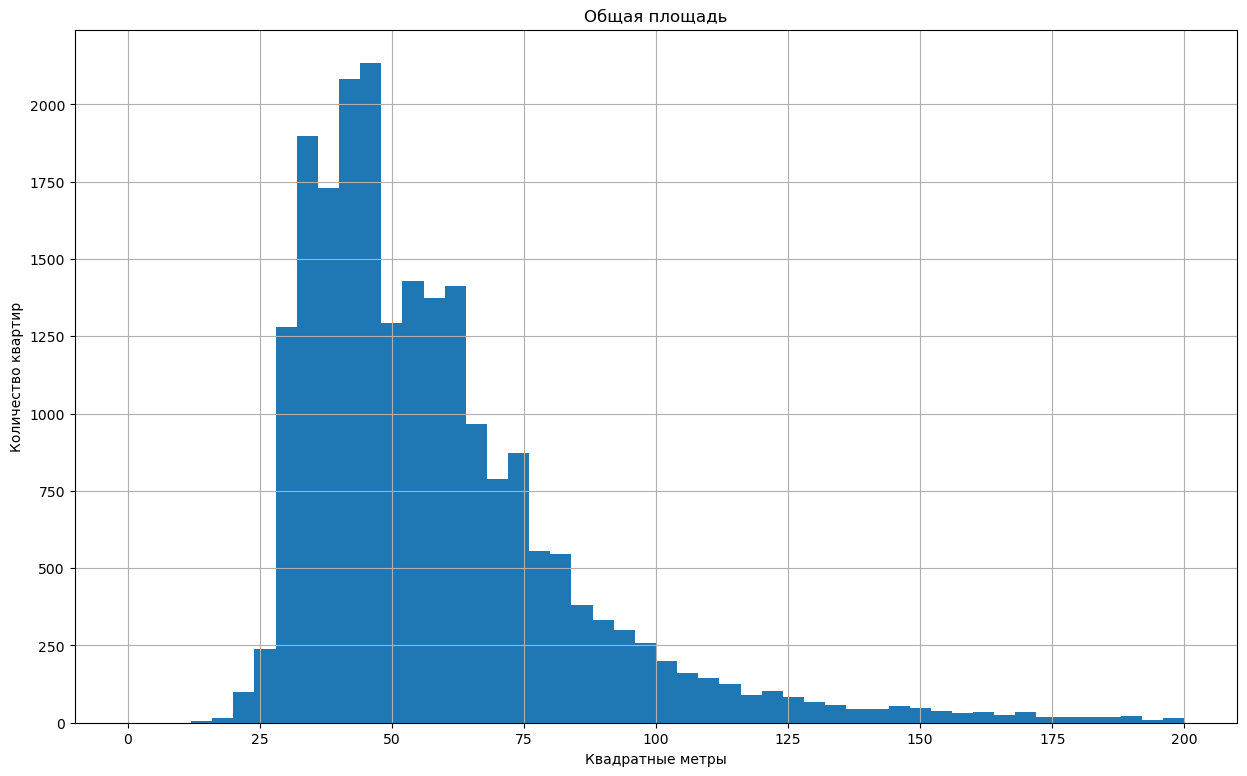

In [147]:
data['total_area'].hist(bins=50, figsize=(15, 9), range=(0, 200))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир');

Оснавная масса квартир имеет площадь от 25 до 50 м2.

### Жилая площадь

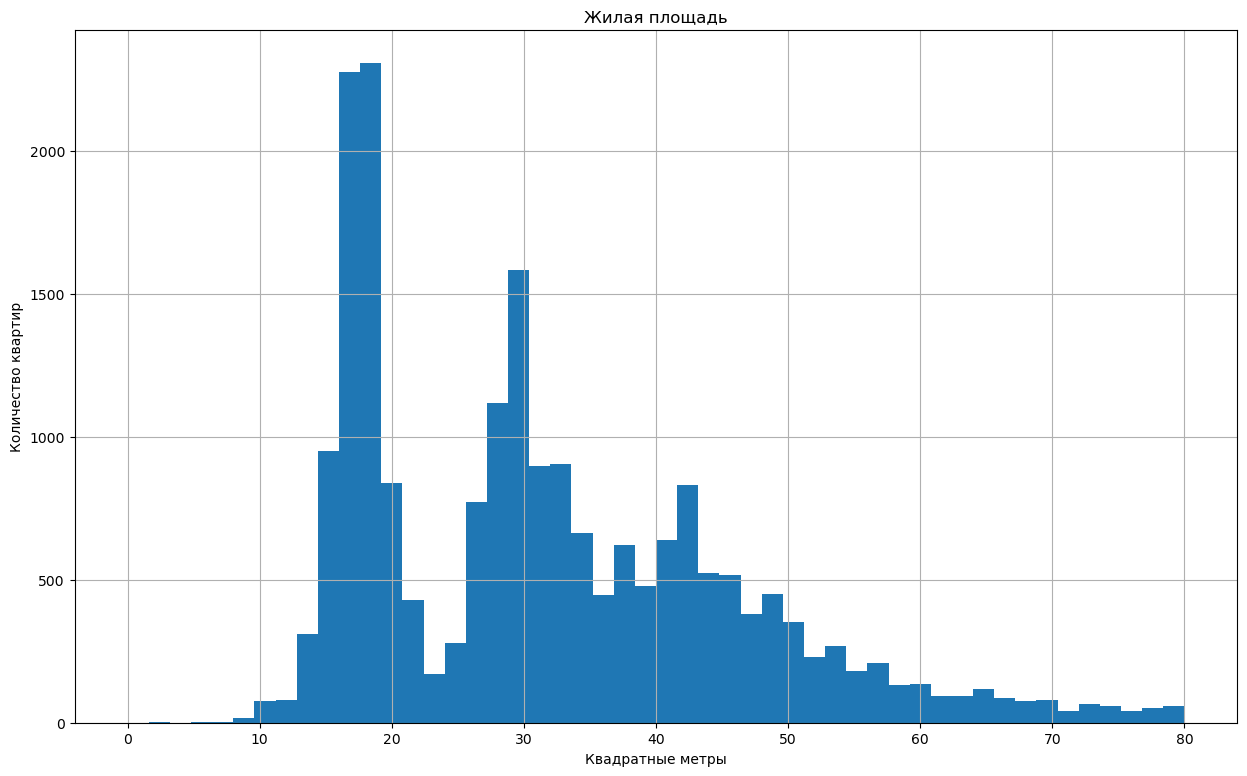

In [148]:
data['living_area'].hist(bins=50, figsize=(15, 9), range=(0, 80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир');

Видим, что на рынке много квартир с жилой площадью 18 и 30 м2

### Площадь кухни

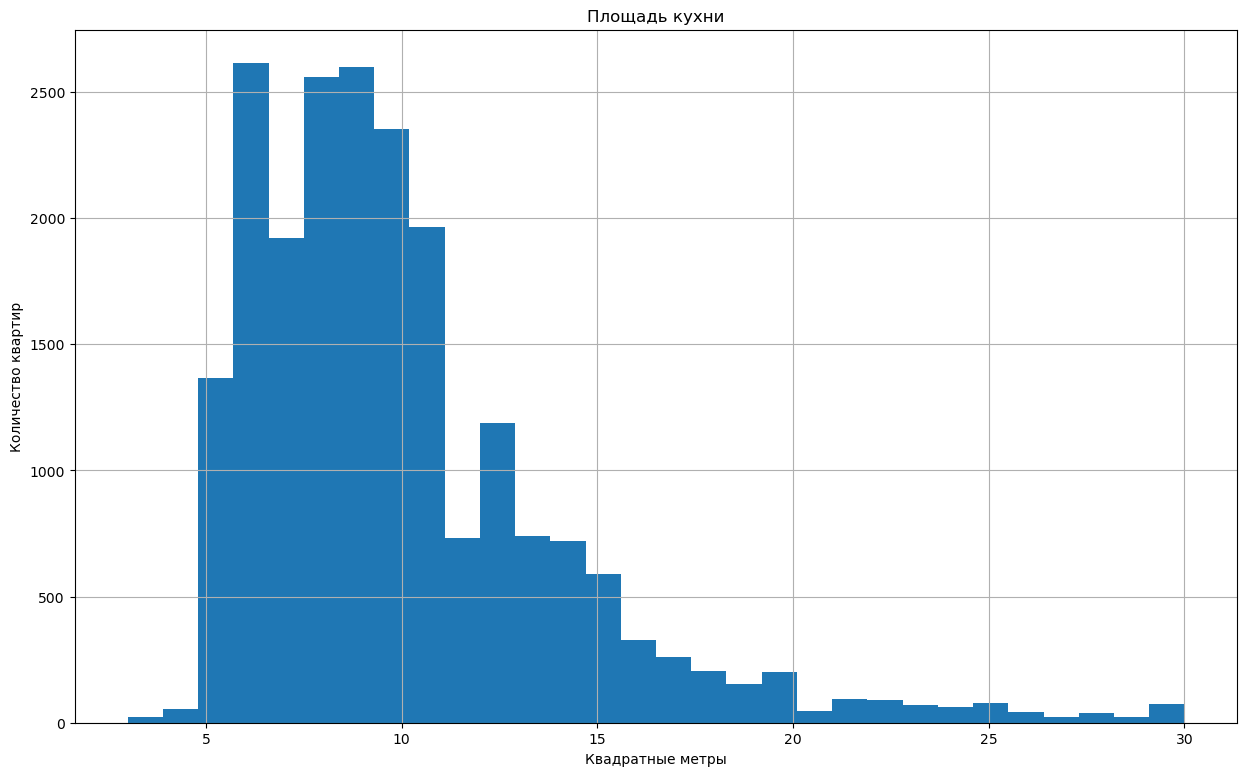

In [149]:
data['kitchen_area'].hist(bins=30, figsize=(15, 9), range=(3, 30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир');

Видим, что много предложений с площадью кухни до 10 м2.

### Цена объекта

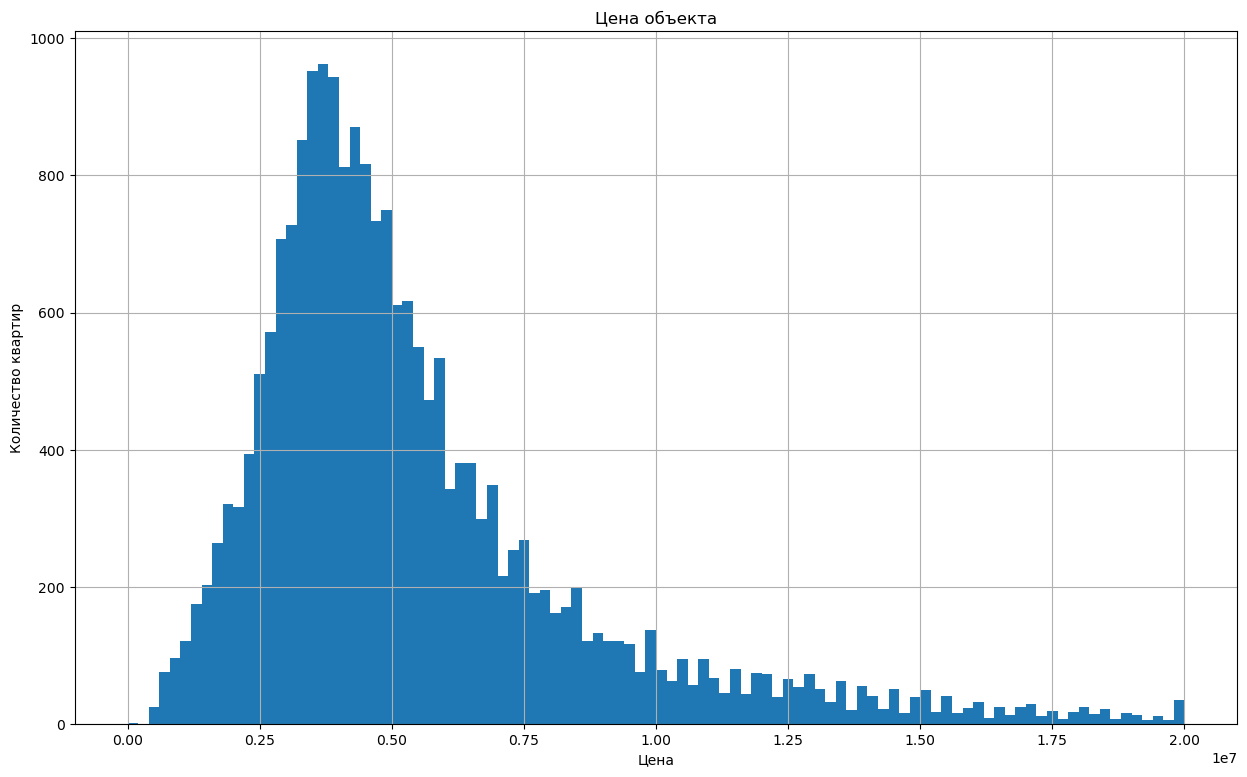

In [150]:
data['last_price'].hist(bins=100, figsize=(15, 9), range=(0, 20000000))
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир');

Наибольшее число квартир представлено в сегменте 2 500 000 - 5 000 000 руб.

### Количество комнат

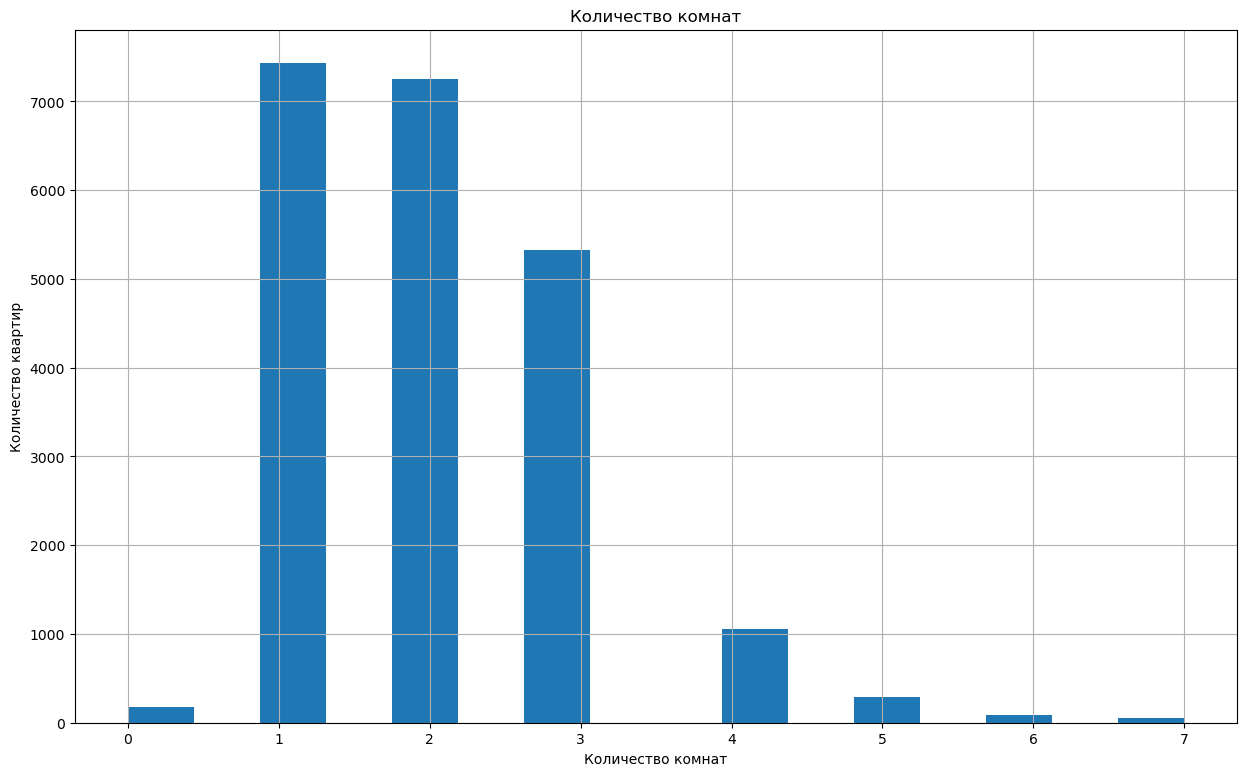

In [151]:
data['rooms'].hist(bins=data['rooms'].nunique(), figsize=(15, 9), range=(0, 7))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир');

Тут без сюрпризов. Самые популярные одно-, дву-, трёх-, комнатные квартиры.

### Высота потолков

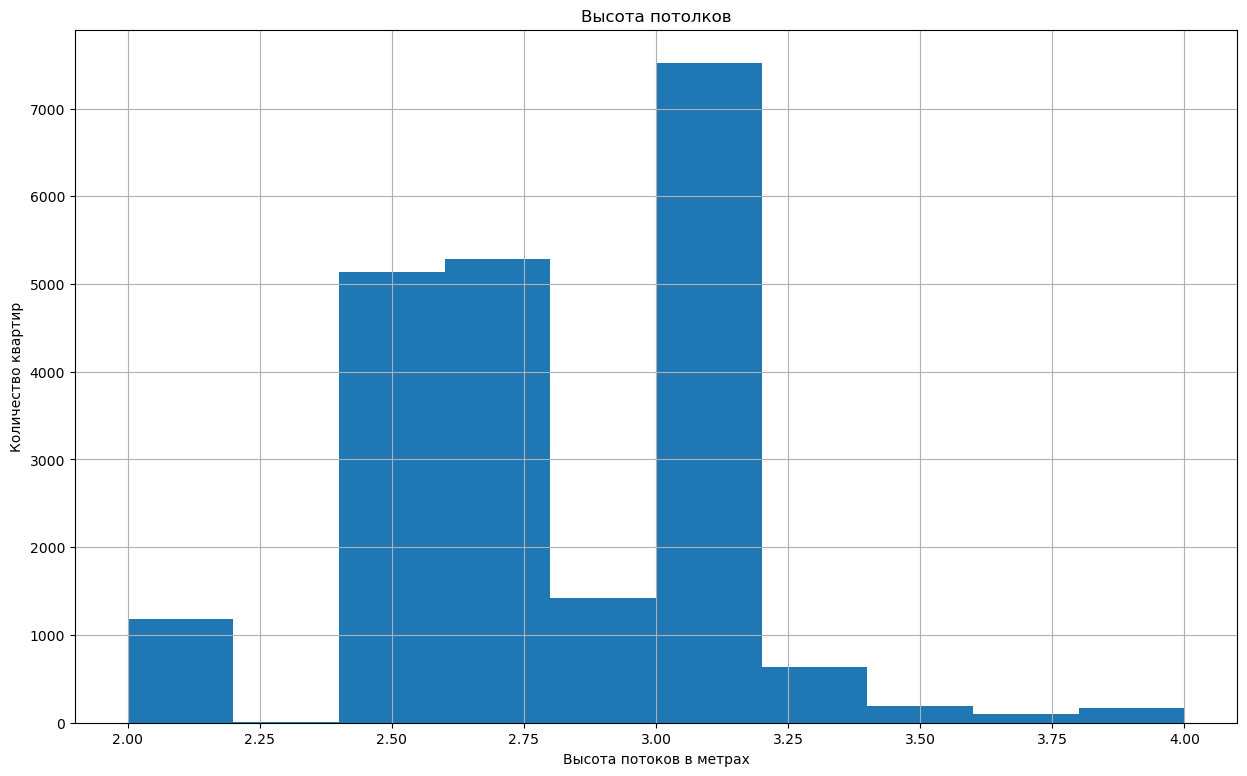

In [152]:
data['ceiling_height'].hist(bins=10, figsize=(15, 9), range=(2, 4))
plt.title('Высота потолков')
plt.xlabel('Высота потоков в метрах')
plt.ylabel('Количество квартир');

С потолками в Санкт-Петербурге и его окрестностях все в порядке. 2,5-3 м достойное пространство.

### Этаж квартиры

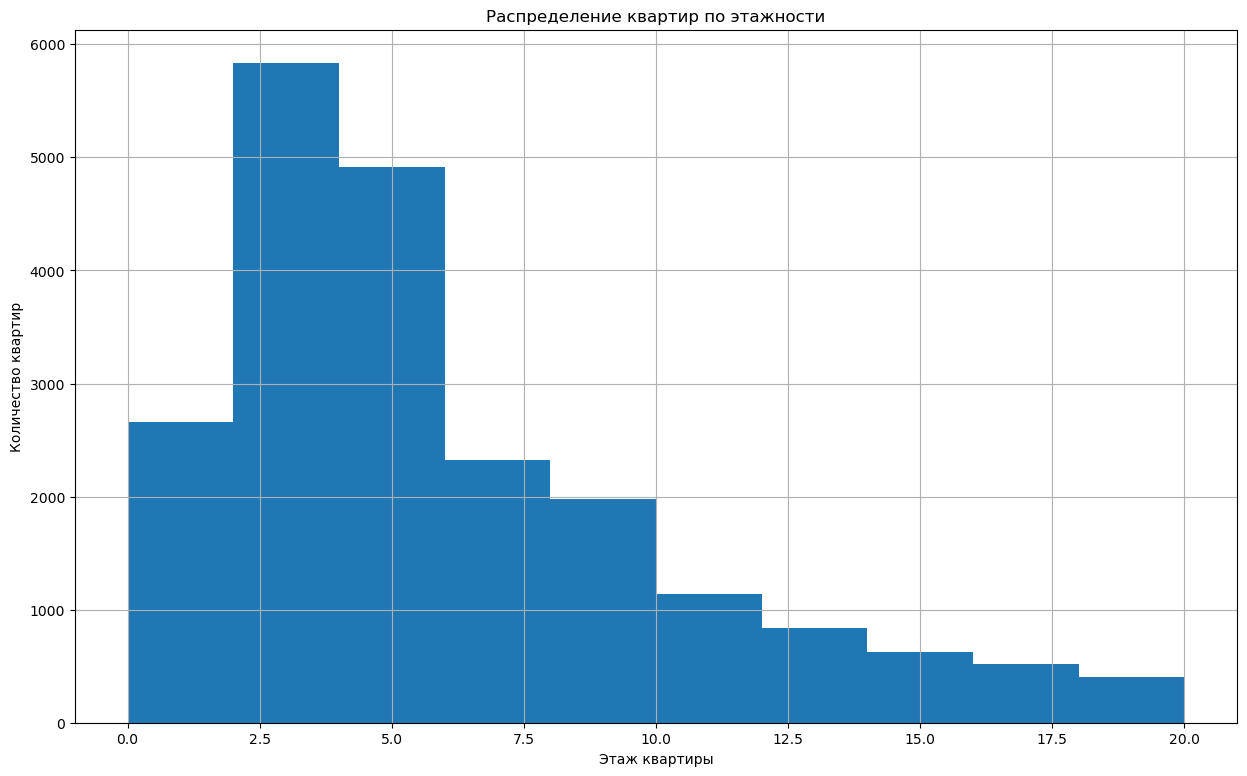

In [153]:
data['floor'].hist(bins=10, figsize=(15, 9), range=(0, 20))
plt.title('Распределение квартир по этажности')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир');

Очень много кварти представлено на 3-5 этажах

### Тип этажа квартиры («первый», «последний», «другой»)

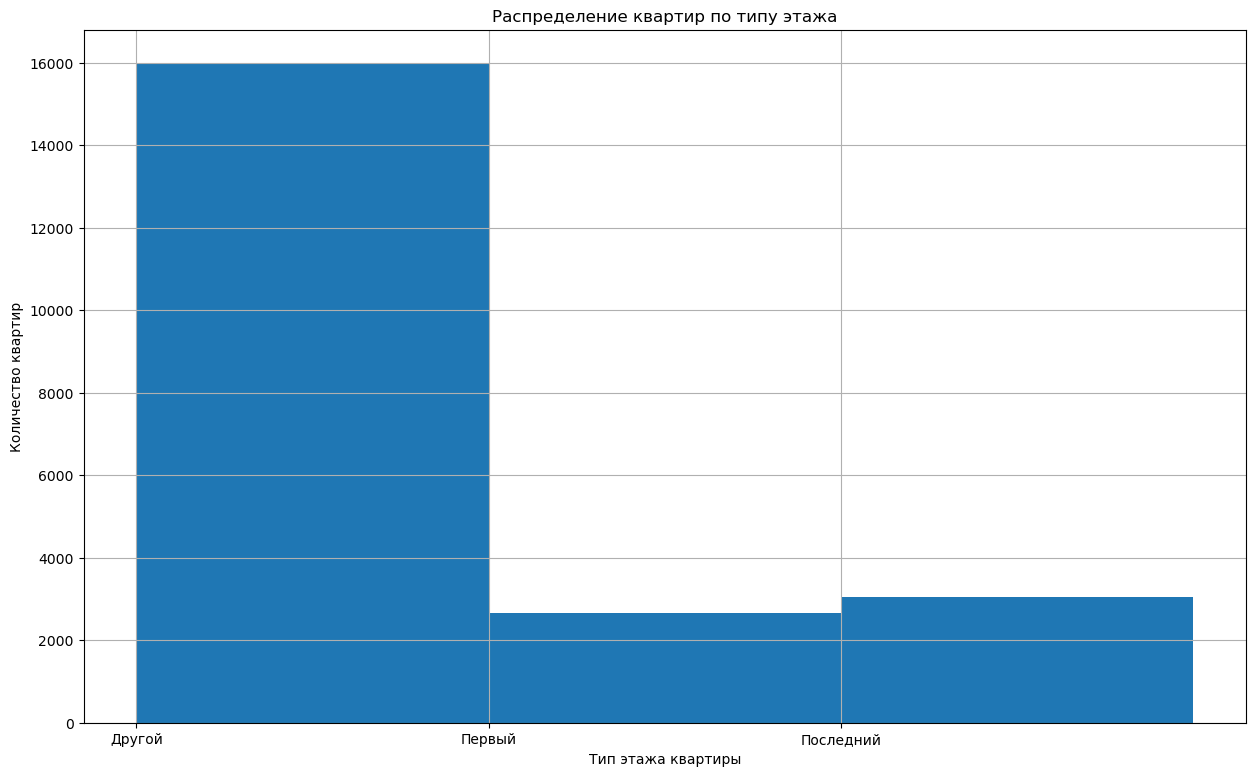

In [154]:
data['floor_type'].hist(bins=3, figsize=(15, 9), range=(0, 3))
plt.title('Распределение квартир по типу этажа')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество квартир');

Выглядет все логично. Первый и последний этаж представлены в равных пропорциях. Квартиры на других этажах на порядок выше.

### Общее количество этажей в доме

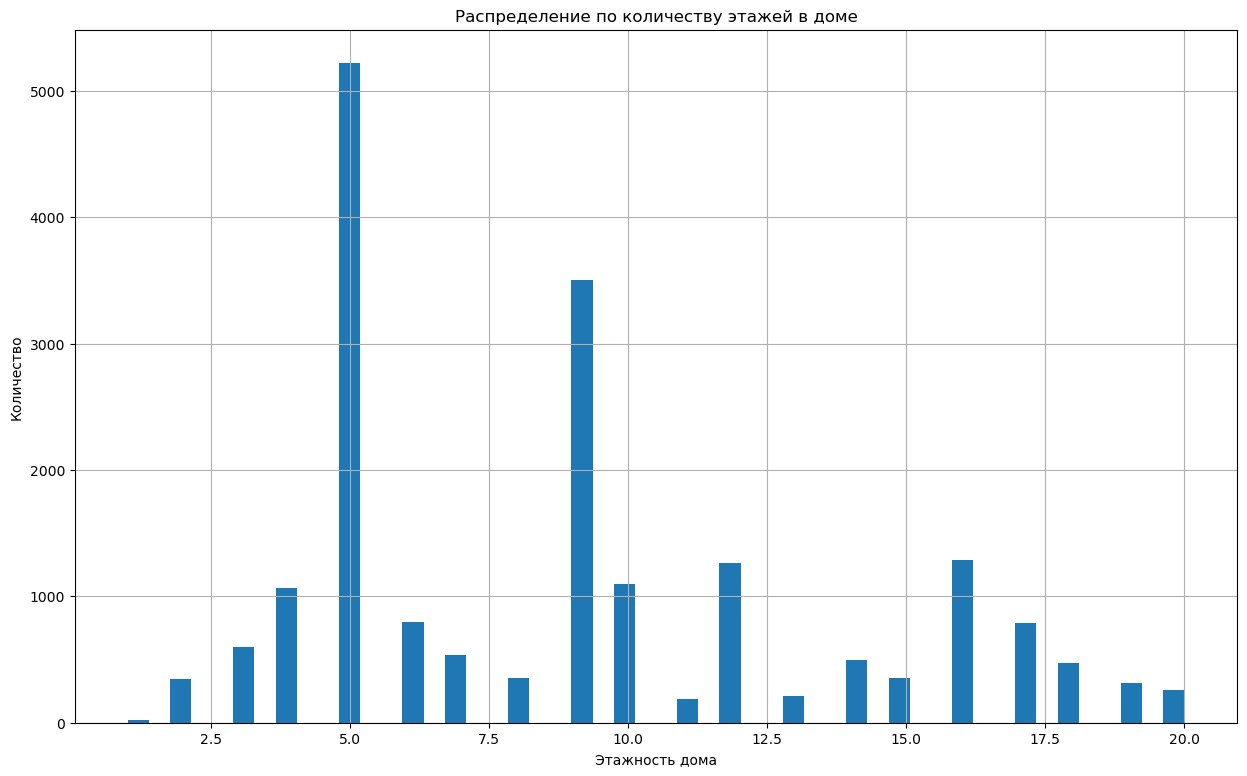

In [155]:
data['floors_total'].hist(bins=50, figsize=(15, 9), range=(1, 20))
plt.title('Распределение по количеству этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество');

Больше всего пяти и девятиэтажек.

### Расстояние до центра города в метрах

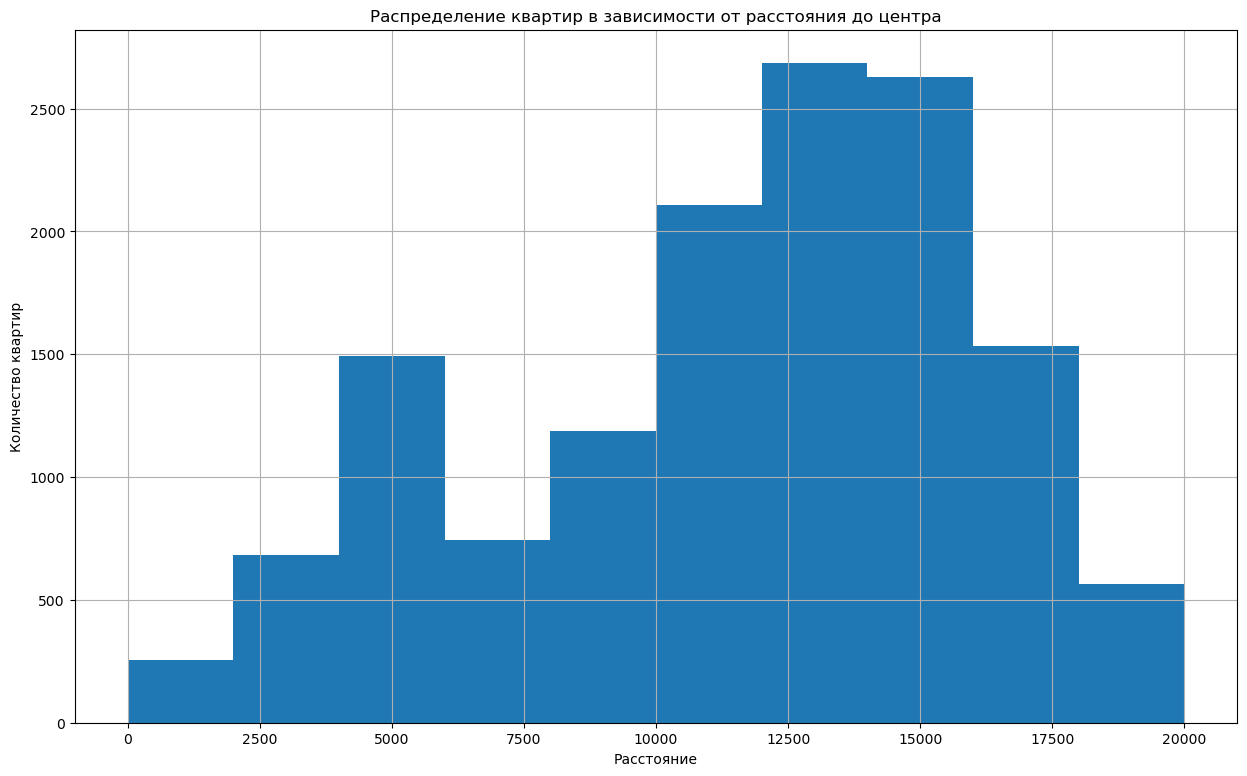

In [156]:
data['cityCenters_nearest'].hist(bins=10, figsize=(15, 9), range=(0, 20000))
plt.title('Распределение квартир в зависимости от расстояния до центра')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир');

12-14 км от центра это минут 20-25 на общественном транспорте. Большая часть квартир располагаются именно на таком растояние.

### Расстояние до ближайшего аэропорта

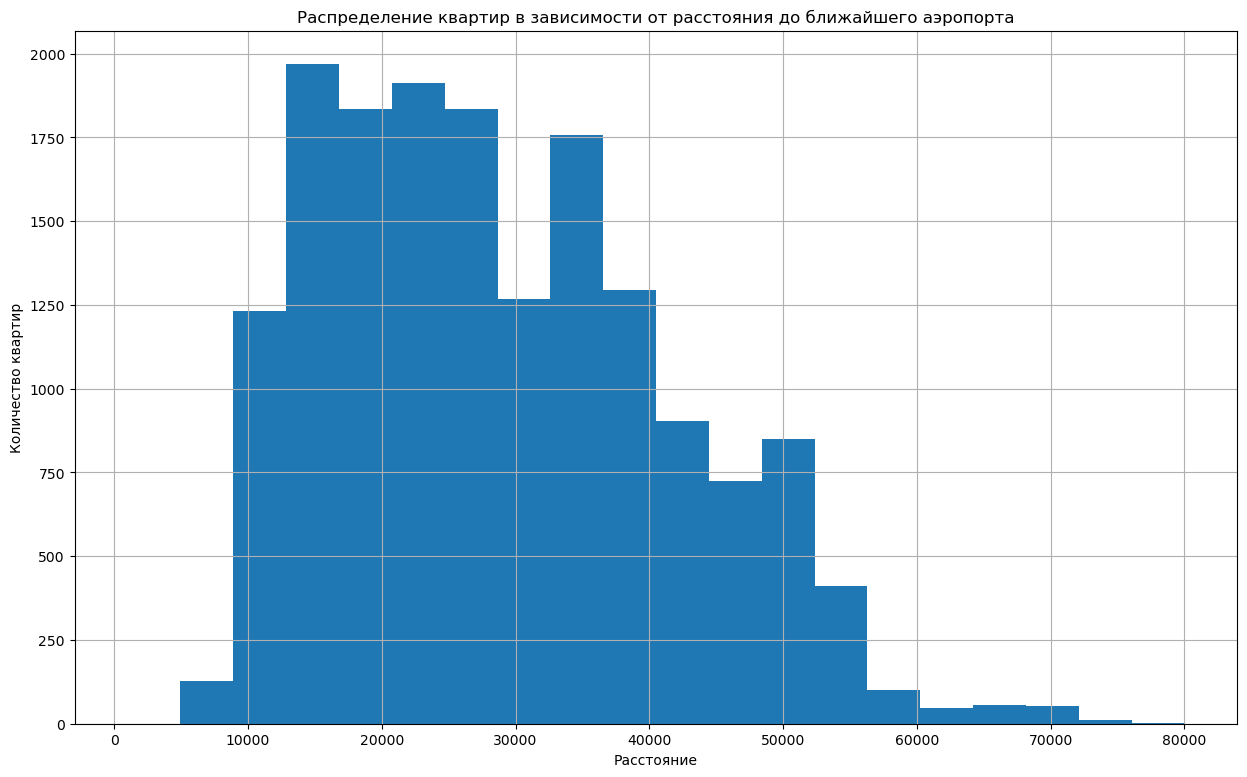

In [157]:
data['airports_nearest'].hist(bins=20, figsize=(15, 9), range=(1000, 80000))
plt.title('Распределение квартир в зависимости от расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир');

15-25 км до аэропорта. Именно в этом диапазоне представлено наибольшее число квартир.

### Расстояние до ближайшего парка

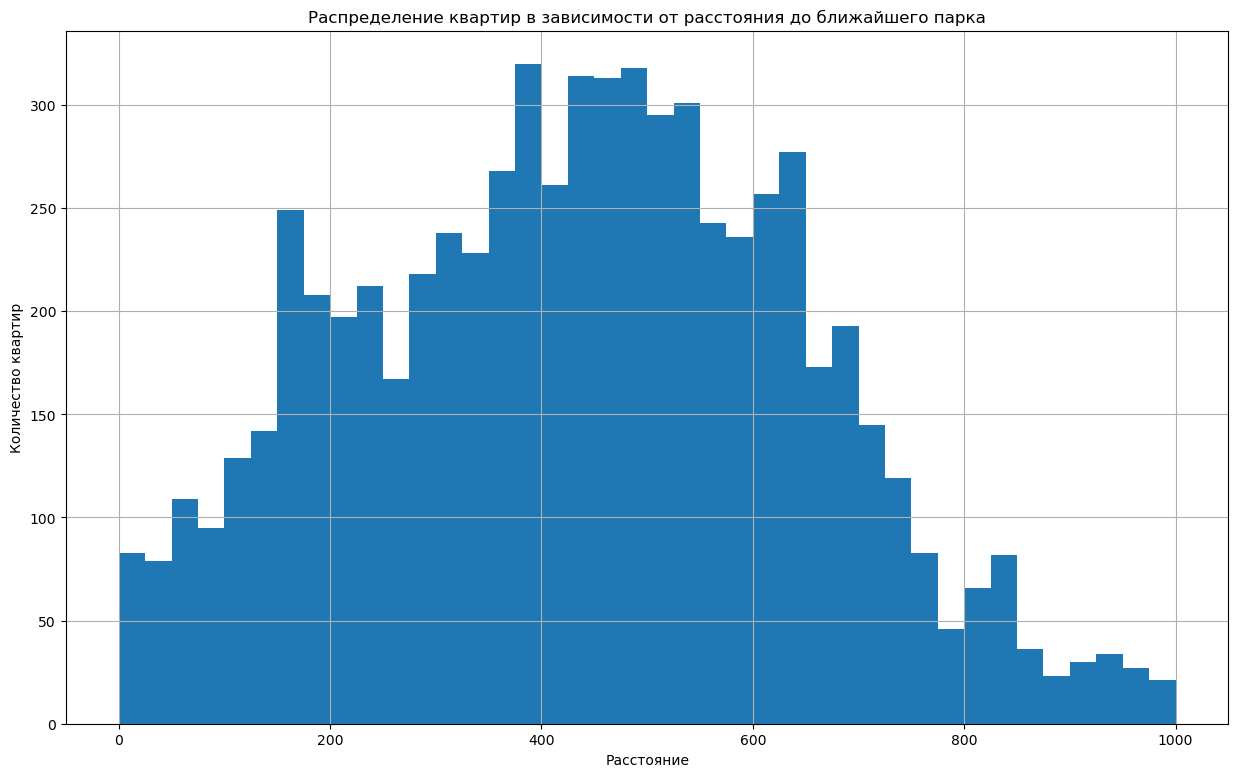

In [158]:
data['parks_nearest'].hist(bins=40, figsize=(15, 9), range=(0, 1000))
plt.title('Распределение квартир в зависимости от расстояния до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир');

400-600 м до парка. Неплохой показатель.

### День публикации объявления.

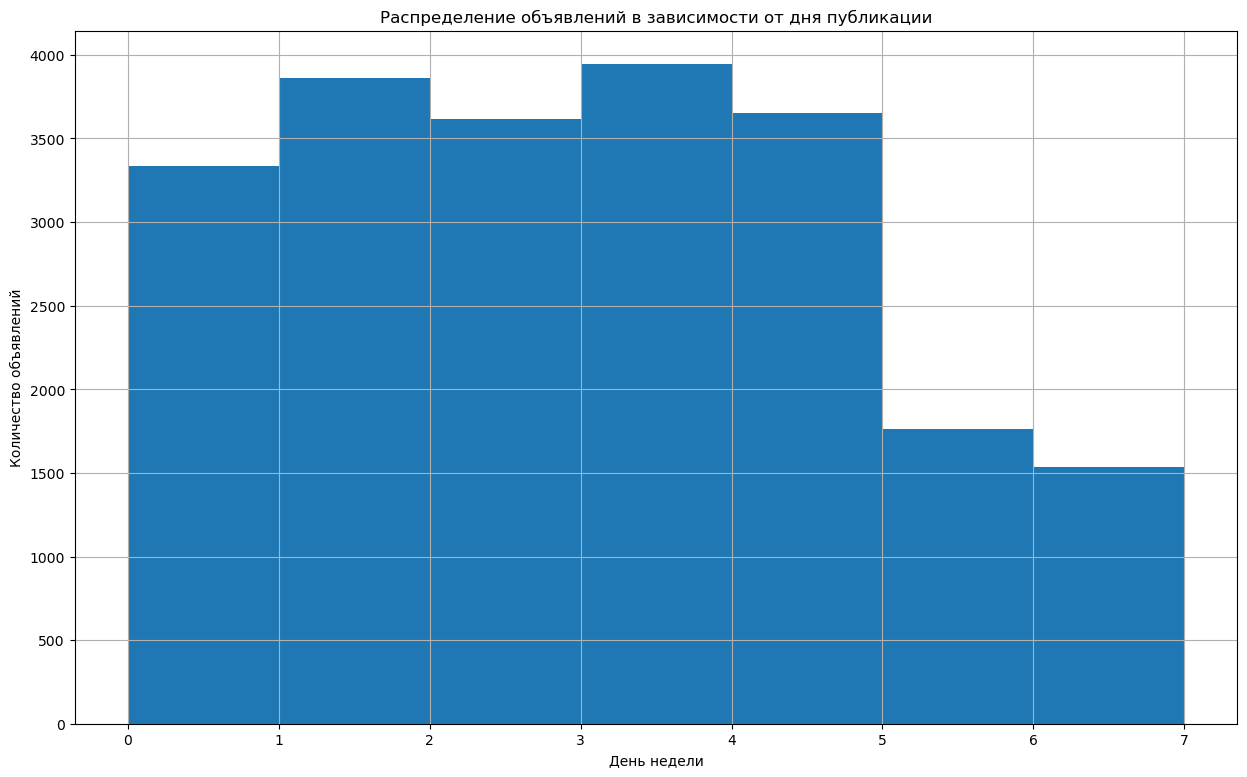

In [159]:
data['day_exposition'].hist(bins=data['day_exposition'].nunique(), figsize=(15, 9), range=(0, 7))
plt.title('Распределение объявлений в зависимости от дня публикации')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений');

Дни для объявления продажи: понедельник, вторник, четверг, пятница.

 ### Месяц публикации объявления.

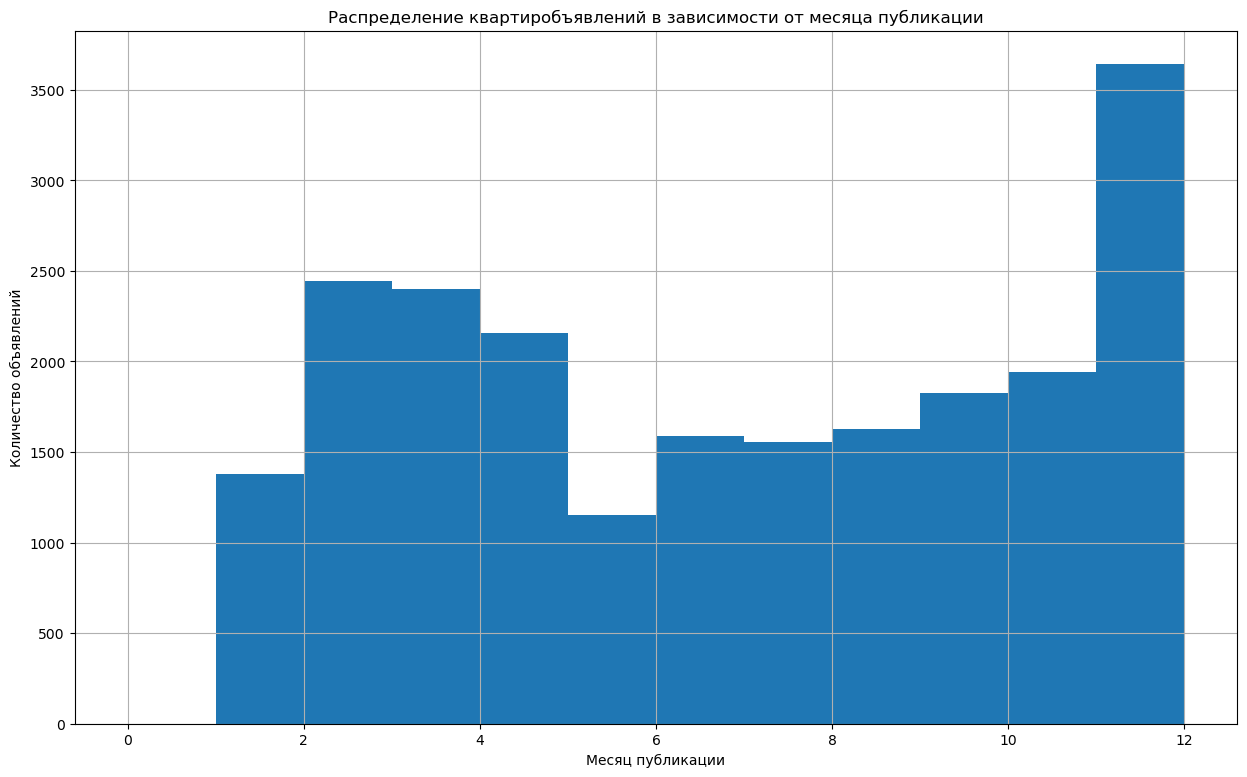

In [160]:
data['month_exposition'].hist(bins=12, figsize=(15, 9), range=(0, 12))
plt.title('Распределение квартиробъявлений в зависимости от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество объявлений');

Традиционно в конце года обяъявлений о продаже больше.

**В целом рынок недвижимости Санкт-Петербурга разнообразен и многогранен. Так что если вы решили купить квартиру, то лучше смотреть в конце года, так в это время традиционно много объявлений. Рядом как правило есть парк, до центра можно бысьро добраться на общественном транспорте. 25-30 км до аэропорта. 3-5 этаж. Двушка или трёшка, пожалуйста, на выбор.**

### Как быстро продавались квартиры

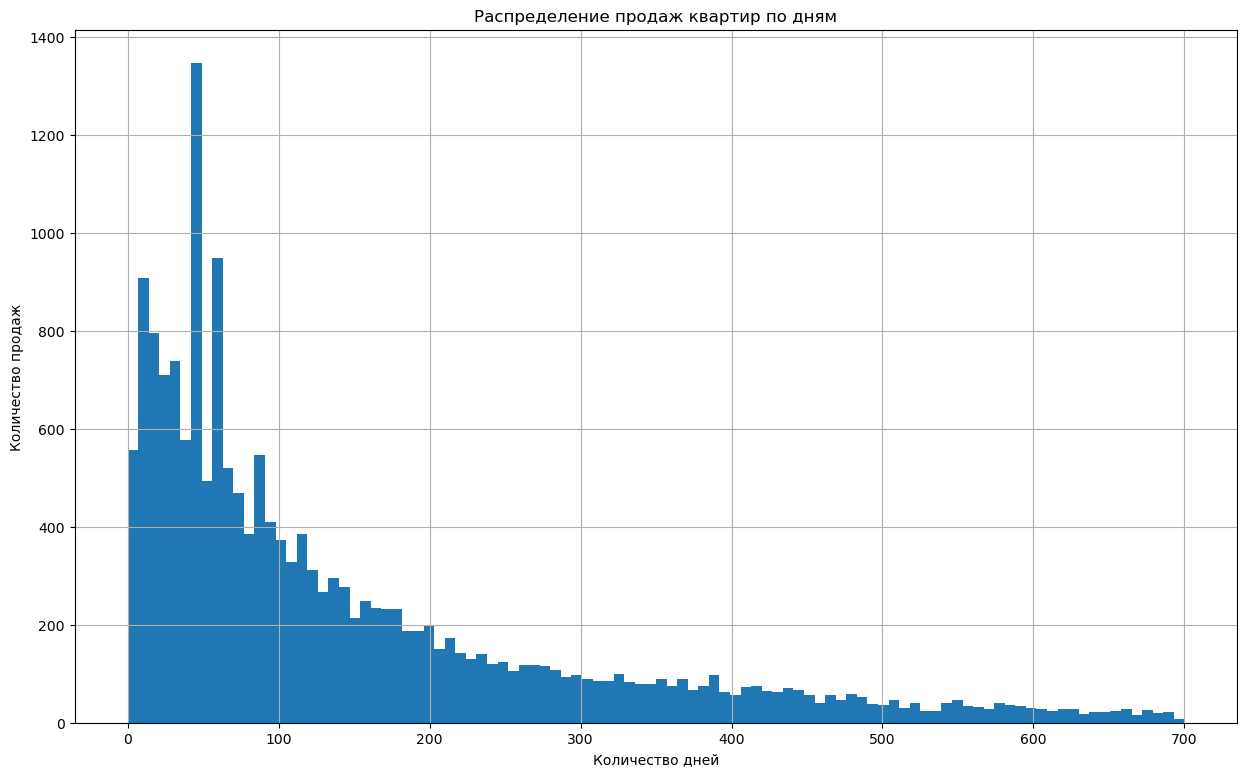

In [161]:
data['days_exposition'].hist(bins=100, figsize=(15, 9), range=(0, 700))
plt.title('Распределение продаж квартир по дням')
plt.xlabel('Количество дней')
plt.ylabel('Количество продаж');

In [162]:
data['days_exposition'].describe()

count    18712.000000
mean       182.278805
std        221.024422
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение 182. Медианное 97. Лучше всего продаются квартиры в первые 100 дней после размещения объявления.

### Зависимоть цены от площади

In [163]:
data_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type']]

In [164]:
data_corr.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.650452,0.564365,0.485220,0.359252
total_area,0.650452,1.000000,0.940272,0.621598,0.759020
living_area,0.564365,0.940272,1.000000,0.445321,0.840797
kitchen_area,0.485220,0.621598,0.445321,1.000000,0.289657
rooms,0.359252,0.759020,0.840797,0.289657,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

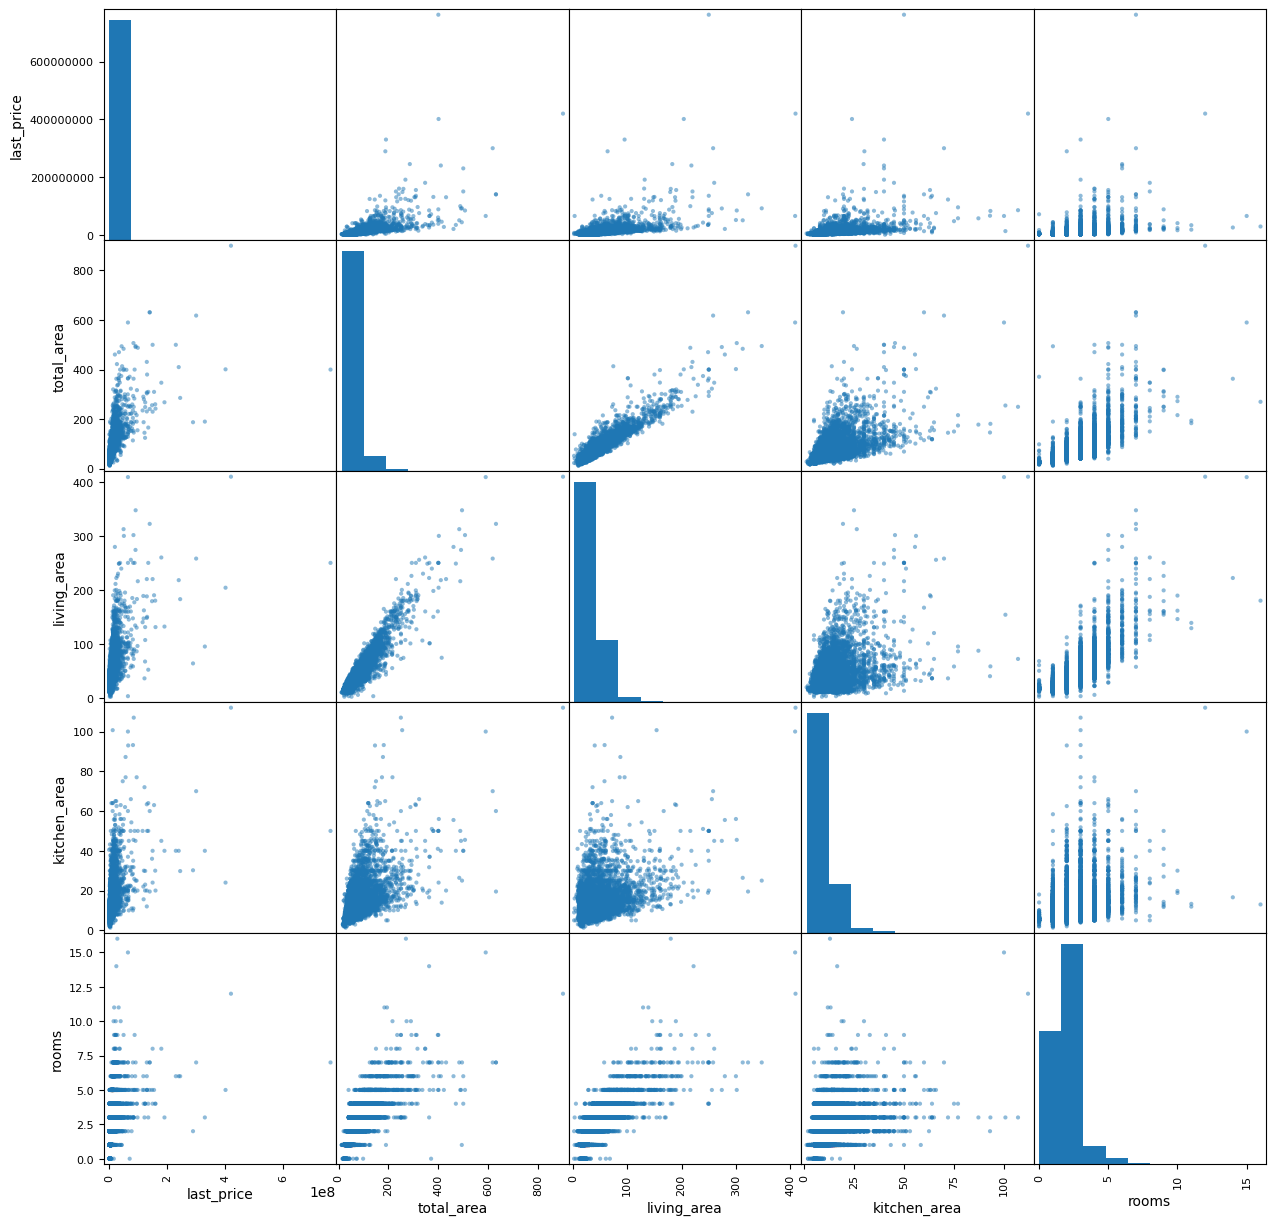

In [165]:
pd.plotting.scatter_matrix(data_corr, figsize=(15, 15)) 

**Видим, что стоимость квартиры в большей степени зависит от общей площади (0,65), в меньшей степени от жилой площади (0,54), площади кухни(0,44) и количества комнат(0,36).**

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [166]:
data_sorted = data.pivot_table(index = 'locality_name', values = 'aria_price', aggfunc = ['count', 'mean'])
data_sorted.columns = ['count', 'mean']

In [167]:
data_sorted.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,13918,115495.523950
посёлок Мурино,552,85629.568641
посёлок Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
посёлок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


In [168]:
data_sorted

,count,mean
locality_name,,
Бокситогорск,16,17551.591250
Волосово,36,40183.326111
Волхов,111,35087.680000
Всеволожск,398,68654.473970
Выборг,237,58141.909325
...,...,...
садовое товарищество Рахья,1,37777.780000
село Копорье,5,46051.530000
село Павлово,7,61892.911429


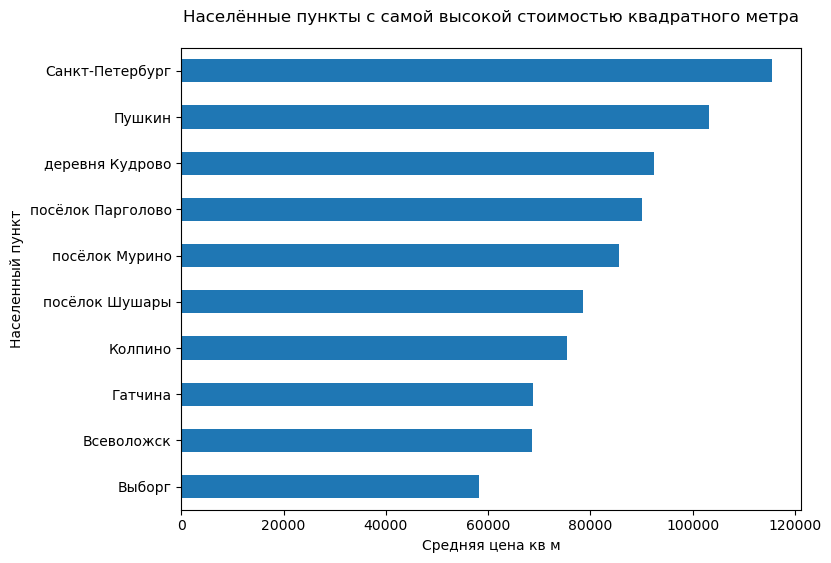

In [169]:
ten_localities = data_sorted.sort_values(by='count', ascending=False).head(10).reset_index()
ten_localities.sort_values(by='mean').plot(x='locality_name', y='mean', 
                 kind='barh', figsize=(8,6), legend=False)
plt.xlabel('Средняя цена кв м')
plt.ylabel('Населенный пункт')
plt.title('Населённые пункты с самой высокой стоимостью квадратного метра\n')
plt.show()

In [170]:
data_sorted.loc[data_sorted['count'] >= 237].sum() / 10

count     1718.400000
mean     83641.882618
dtype: float64

Средняя цена 83 579 за 1м2.

**Населенный пункт с самой высокой стоимостью**

In [171]:
data_sorted[data_sorted['mean'] == data_sorted['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,13918,115495.52395


**Населенный пункт с самой низкой стоимостью**

In [172]:
data_sorted[data_sorted['mean'] == data_sorted['mean'].min()]

,count,mean
locality_name,,
деревня Вахнова Кара,1,11688.31


### Зависимость цены квартира от расположения относительно центра

In [173]:
sp_pivot = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_km', values = 'aria_price', aggfunc = 'mean')

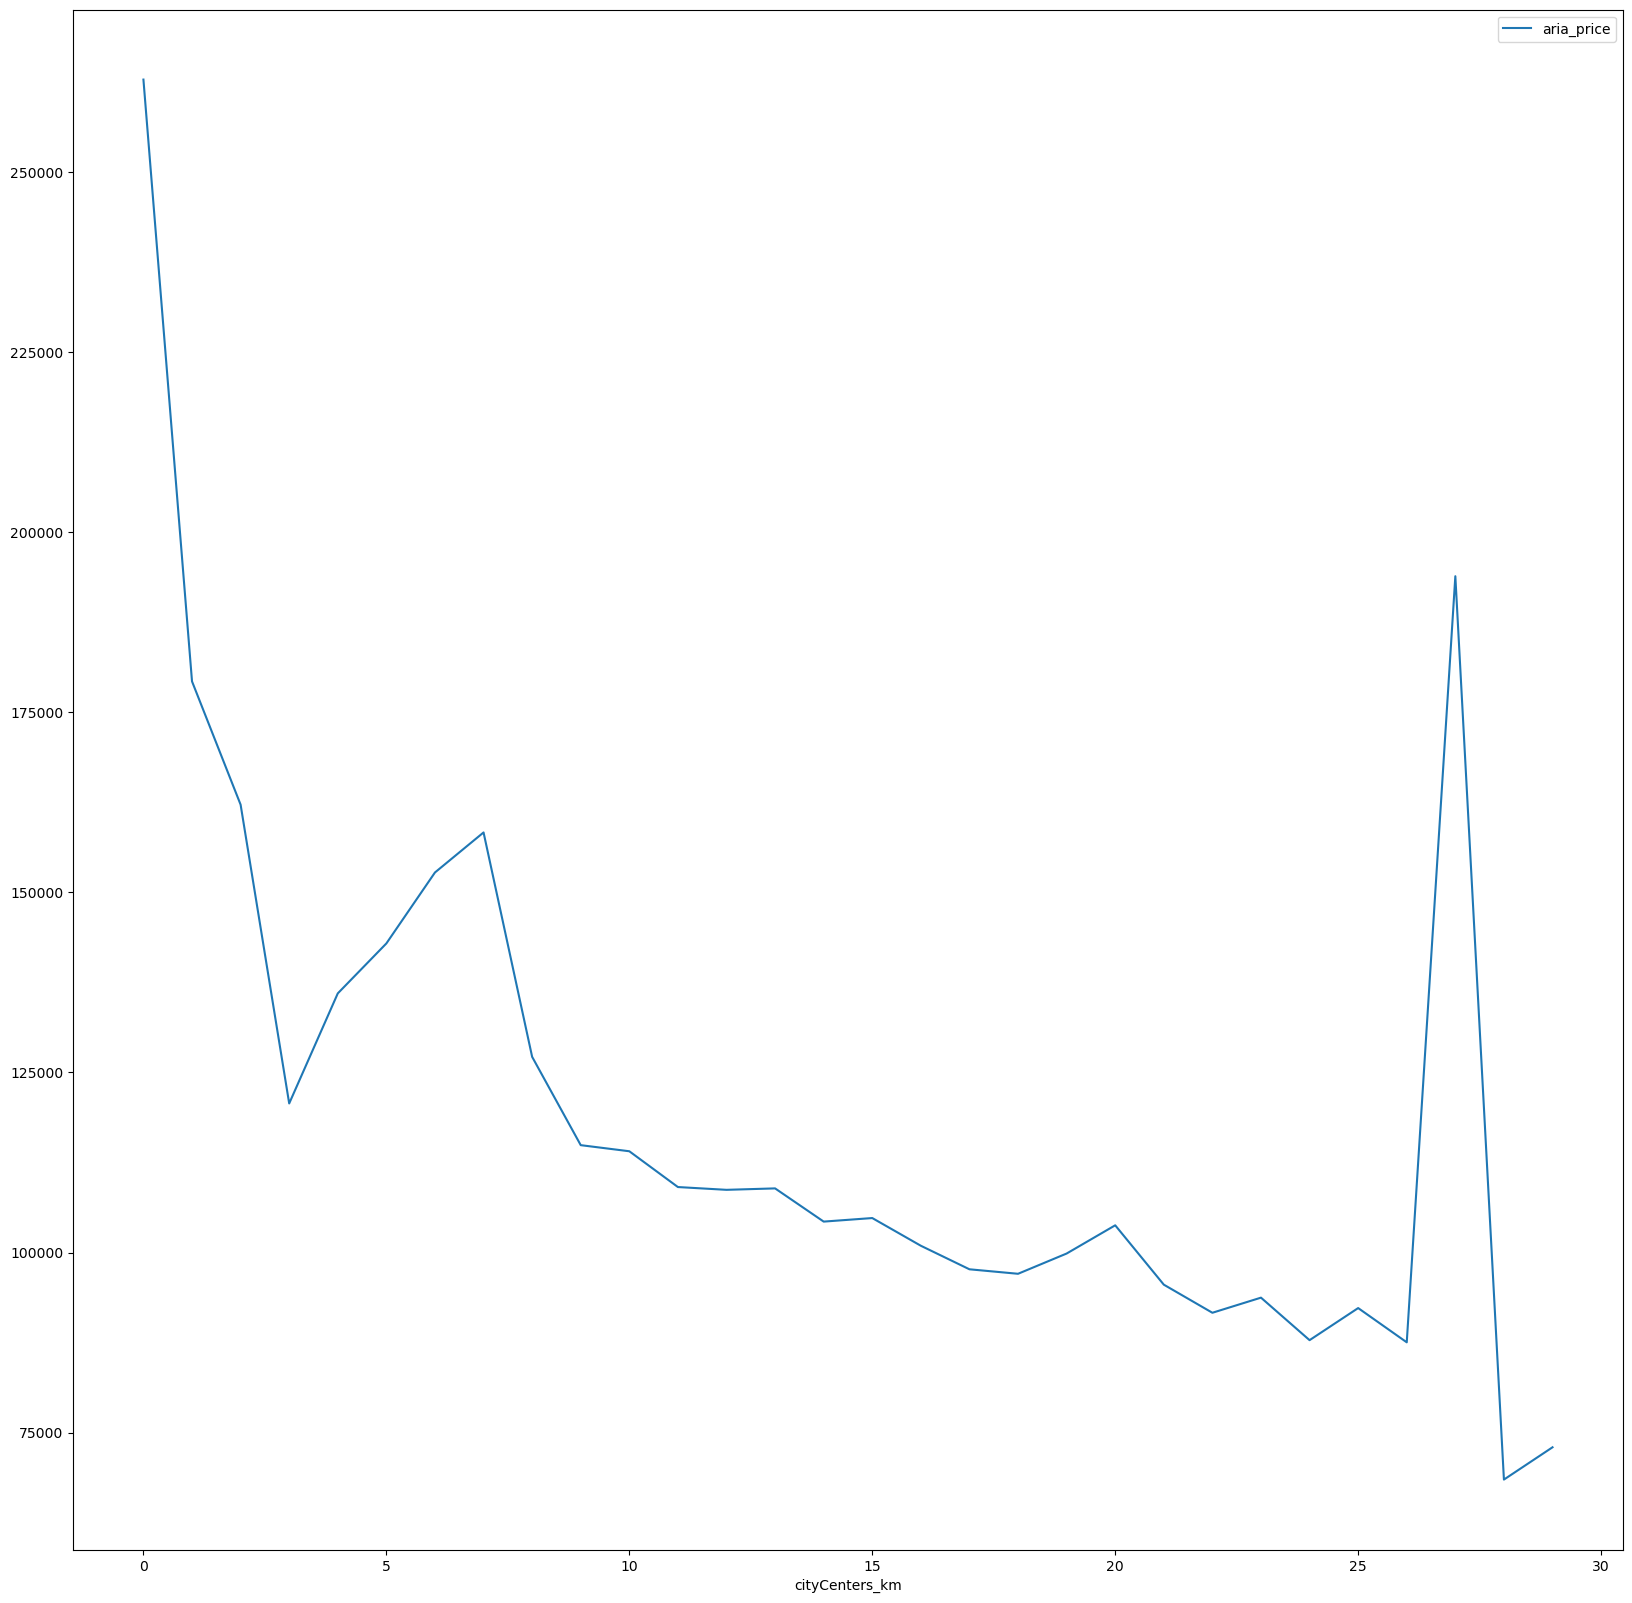

In [174]:
sp_pivot.plot(figsize=(20, 20));

Ничего удивительного, чем дальше от центра, тем недвижимость дешевле. Но между 25 и 30 киллометрами есть аномальный скачок цен. Возможно это элитные районы.

## Общий вывод

1. Открыли и ознокомились с данными: 
- датасет содержит 22 столбца, 23 699 строк
- обнаружили пропуски
- обнаружили несоответствие некоторой информации типу данных.
2. Сделали предобработку данных:
- устранили пропуски: высоты потолков заполнили медианой ориентируясь на населенный пункт, жилую площадь и площадь кухонь заполнили медианой ориентируясь на общую площадь
- изменили типы данных на необходимые
- устранили неявные дубликаты в наименованиях населенных пунктов
- устранили аномальные значения в столбце ceiling_height 
- добавили новые столбцы "цена квадратного метра", "день недели публикации объявления", "месяц публикации объявления", "год публикации объявления", "тип этажа квартиры"
3. Провели исследовательский анализ данных:
- Оснавная масса квартир имеет площадь от 25 до 50 м2
- Выяснили, что на рынке много квартир с жилой площадью 18 и 30 м2
- Узнали, что много предложений с площадью кухни до 10 м2
- Наибольшее число квартир представлено в сегменте 2 500 000 - 5 000 000 руб.
- Самые многочисленные одно-, дву-, трёх-, комнатные квартиры
- С потолками в Санкт-Петербурге и его окрестностях все в порядке. 2,5-3 м достойное пространство
- Очень много кварти представлено на 3-5 этажах
- Больше всего пяти и девятиэтажек
- 12-14 км от центра это минут 20-25 на общественном транспорте. Большая часть квартир располагаются именно на таком растояние
- 15-25 км до аэропорта. Именно в этом диапазоне представлено наибольшее число квартир
- 400-600 м до ближайшего парка
- Дни с самым большим числом публикаций объявлений: понедельник, вторник, четверг, пятница
- В целом рынок недвижимости Санкт-Петербурга разнообразен и многогранен. Так что если вы решили купить квартиру, то лучше смотреть в конце года, так в это время традиционно много объявлений. Рядом как правило есть парк, до центра можно бысьро добраться на общественном транспорте. 25-30 км до аэропорта. 3-5 этаж. Двушка или трёшка, пожалуйста, на выбор.
- Лучше всего продаются квартиры в первые 100 дней после размещения объявления
- Стоимость квартиры в большей степени зависит от общей площади (0,65), в меньшей степени от жилой площади (0,54), площади кухни(0,44) и количества комнат(0,36)
- Средняя цена 83 579 за 1м2 в 10 населённых пунктах с наибольшим числом объявлений
- Населенный пункт с самой высокой стоимостью - Санкт-Петербург
- Населенный пункт с самой низкой стоимостью -деревня Вахнова Кара
- Чем дальше от центра, тем недвижимость дешевле. Но между 25 и 30 киллометрами есть аномальный скачок цен. Возможно это элитные районы.